In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.TotalCharges.mode()[0]

' '

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
x =df[df['TotalCharges'].isnull()].index

In [12]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13944\1331256907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [13]:
df.iloc[x,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [14]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [26]:
cat_cols = df.select_dtypes(include='O').columns

gender


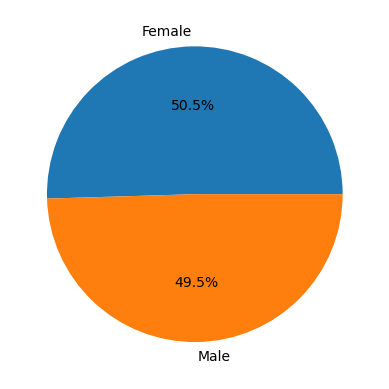

SeniorCitizen


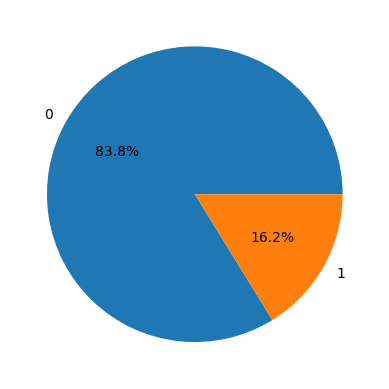

Partner


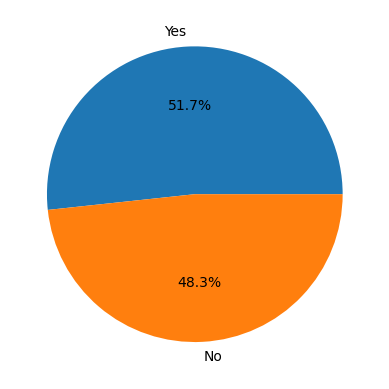

Dependents


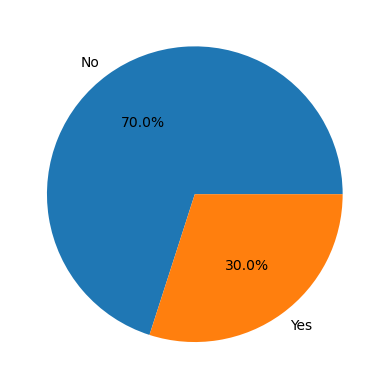

PhoneService


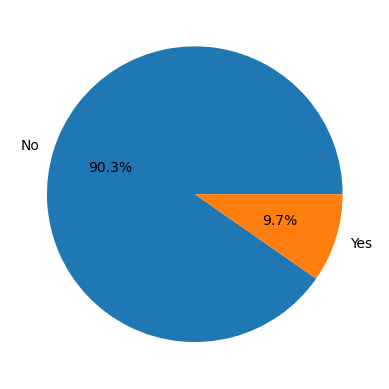

MultipleLines


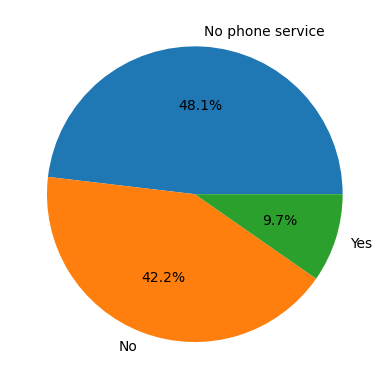

InternetService


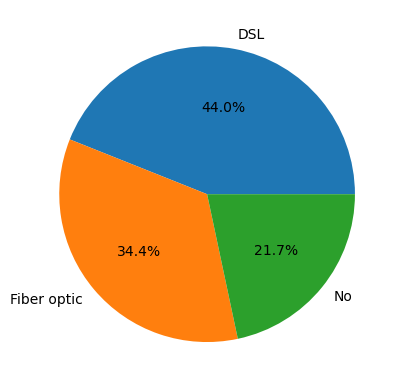

OnlineSecurity


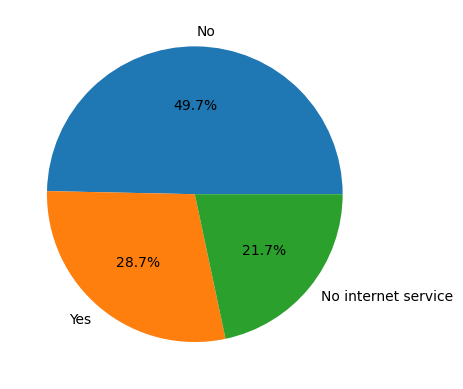

OnlineBackup


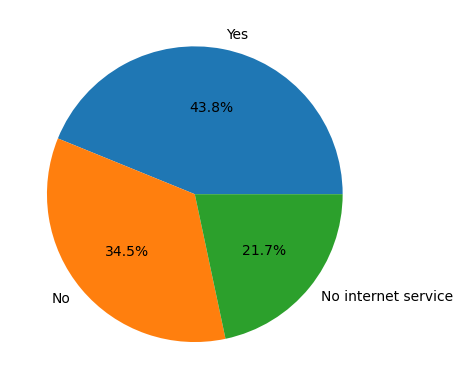

DeviceProtection


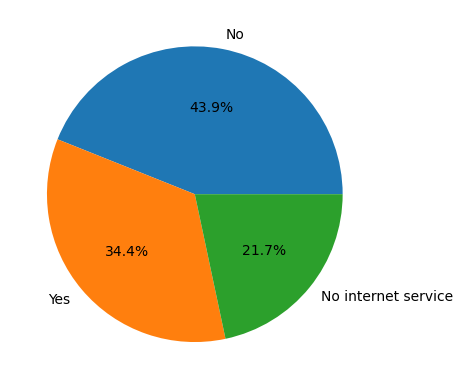

TechSupport


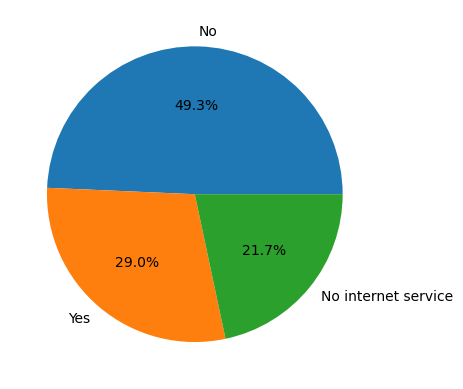

StreamingTV


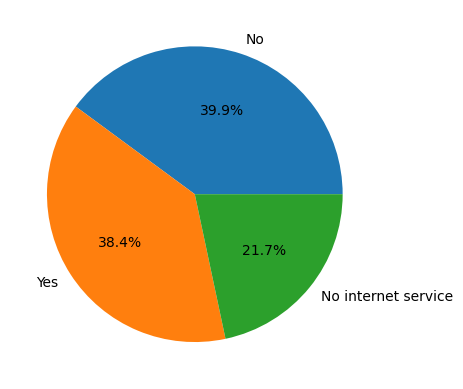

StreamingMovies


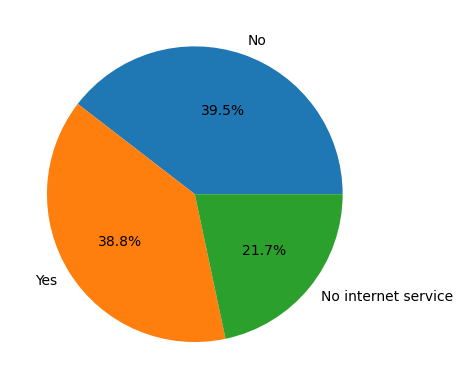

Contract


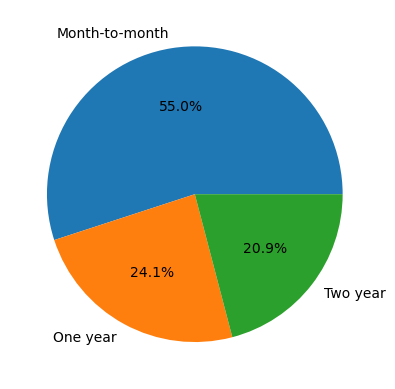

PaperlessBilling


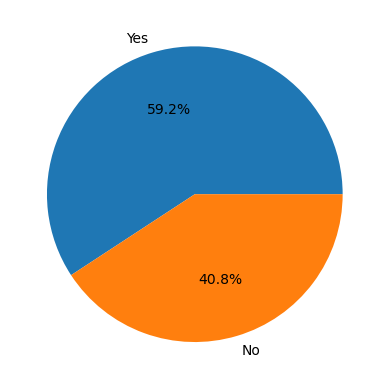

PaymentMethod


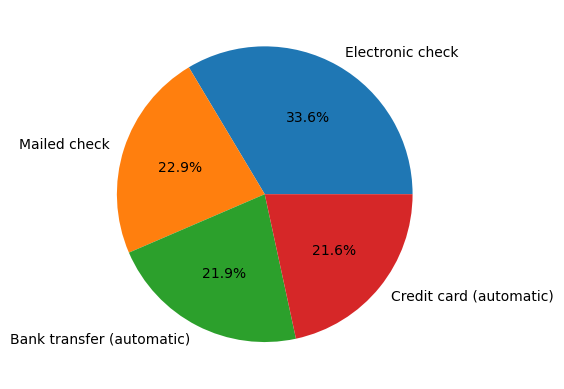

Churn


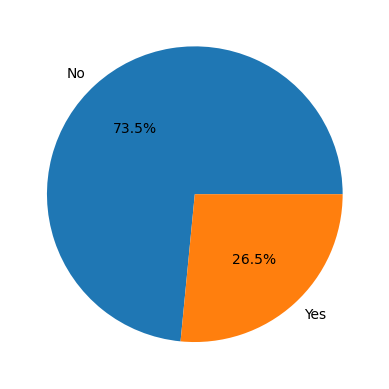

In [27]:
for col in cat_cols:
    print(col)
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
    plt.show()

In [28]:
num_cols = df.select_dtypes(exclude='O').columns

In [29]:
for col in num_cols:
    print(col)
    fig =px.histogram(df, x=col, marginal='box')
    fig.show()
   

tenure


MonthlyCharges


TotalCharges


In [30]:
df.groupby('gender')['Churn'].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [31]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [33]:
df.groupby(['gender', 'Churn'])['Churn'].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

In [34]:
df.Churn = df.Churn.map({'Yes':1, 'No':0})

In [35]:
df.Churn.mean()

0.2653698707936959

In [36]:
df.groupby('gender')['Churn'].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [39]:
gender_churn = df.groupby('gender')['Churn'].mean().reset_index()
gender_churn

,gender,Churn
0,Female,0.269209
1,Male,0.261603


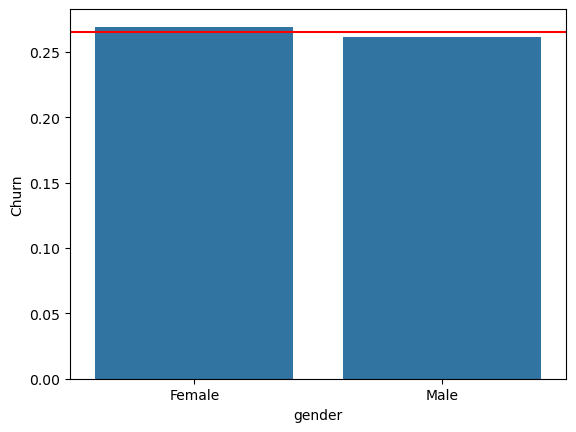

In [43]:
sns.barplot(df.groupby('gender')['Churn'].mean())
plt.axhline(y=df.Churn.mean(), color='red')

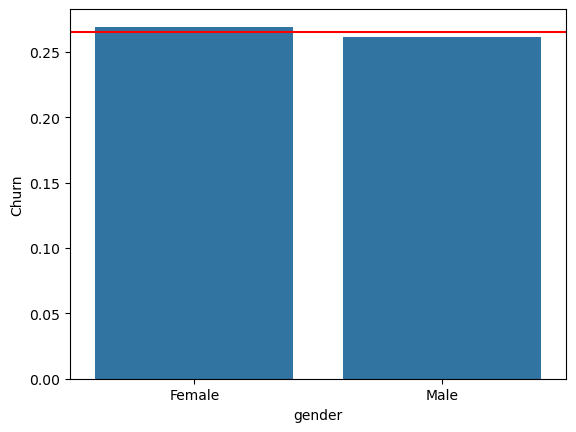

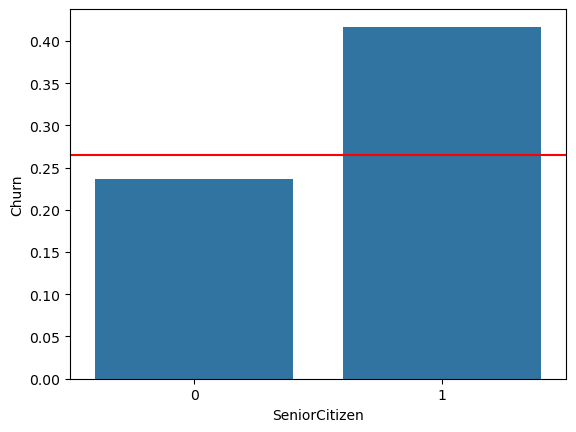

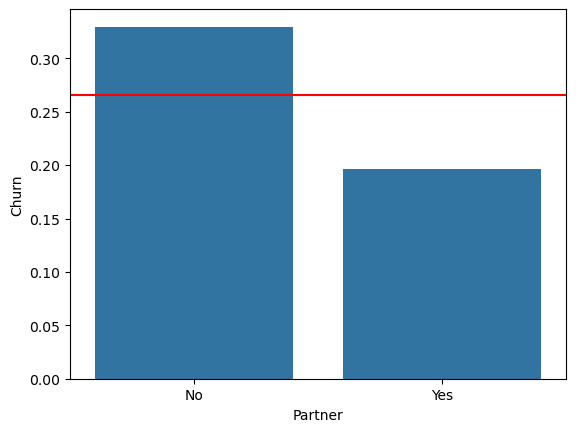

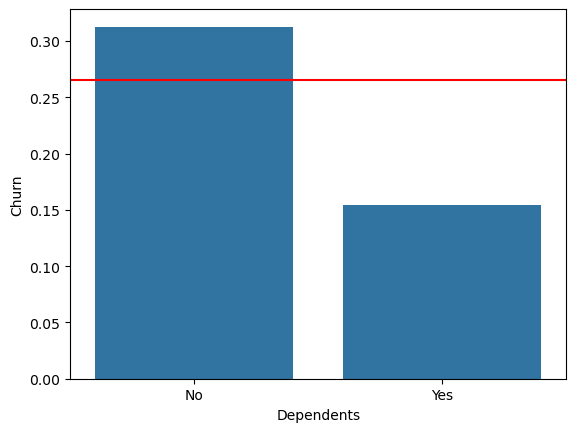

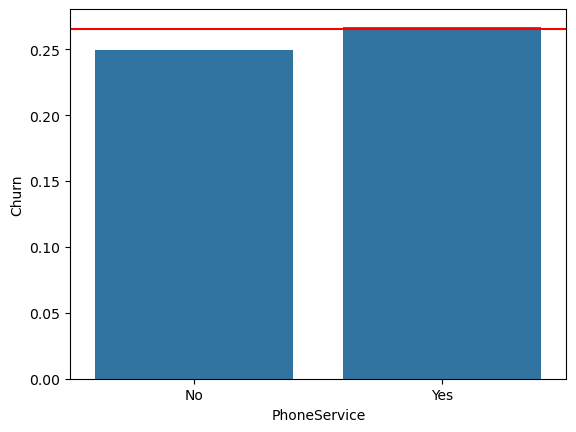

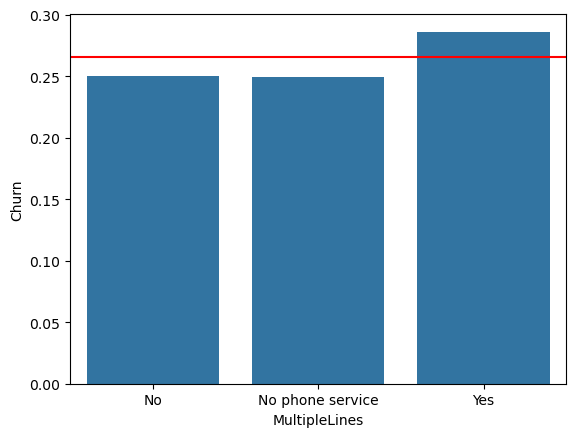

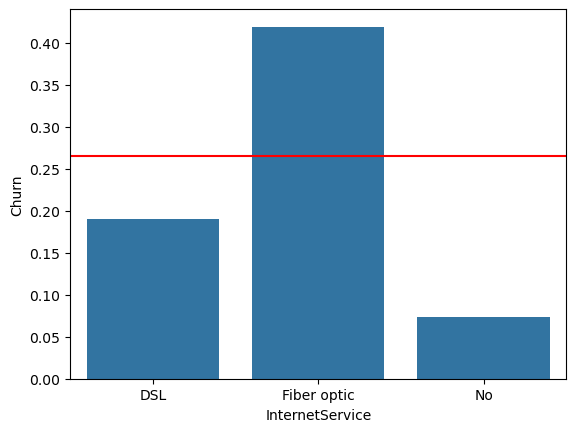

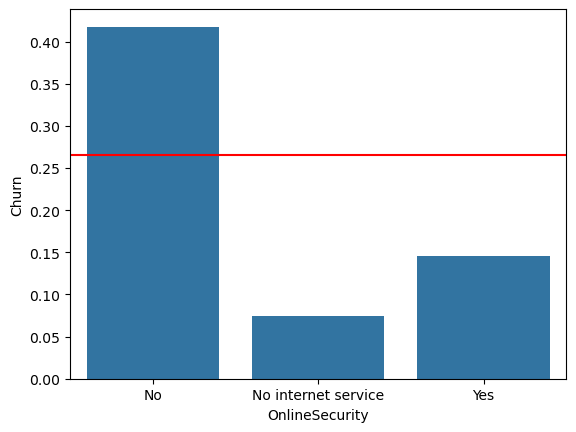

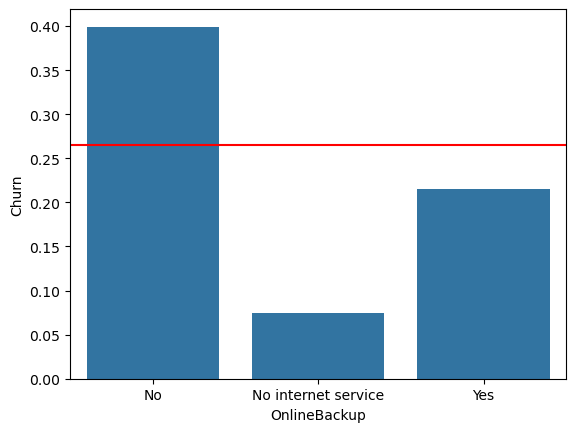

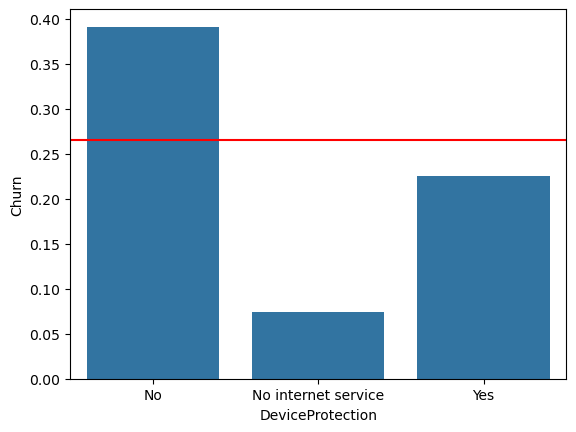

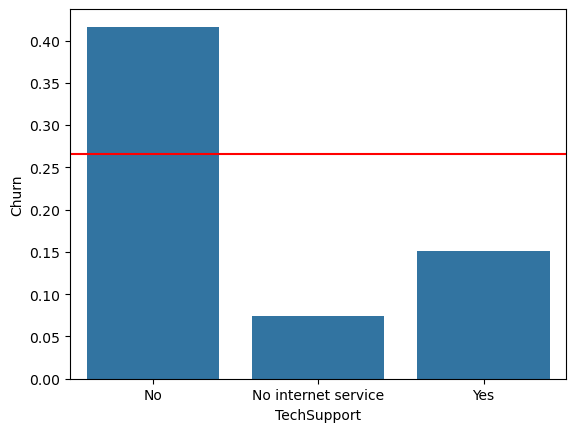

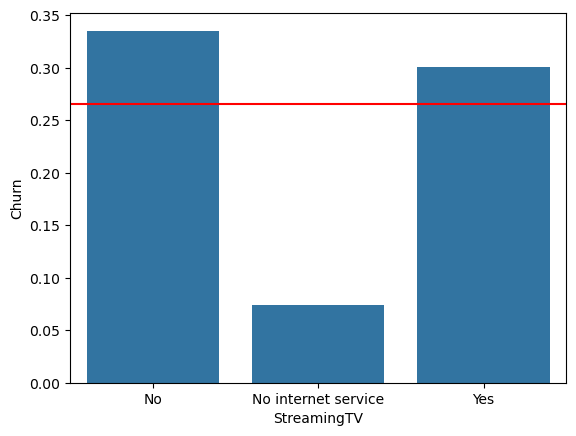

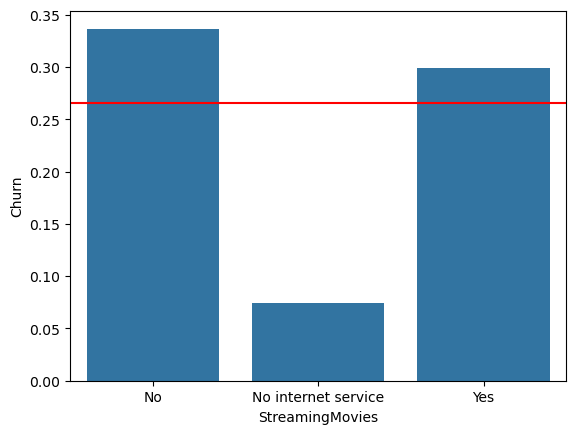

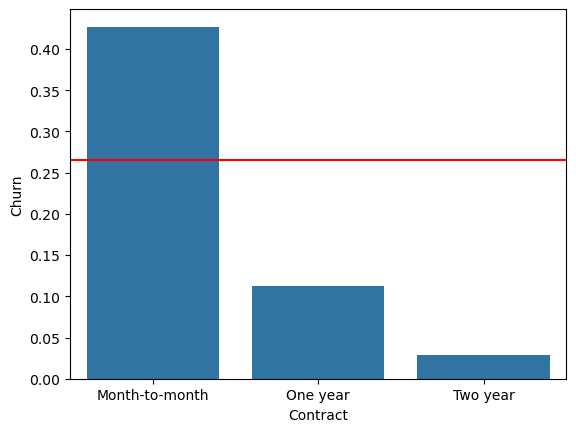

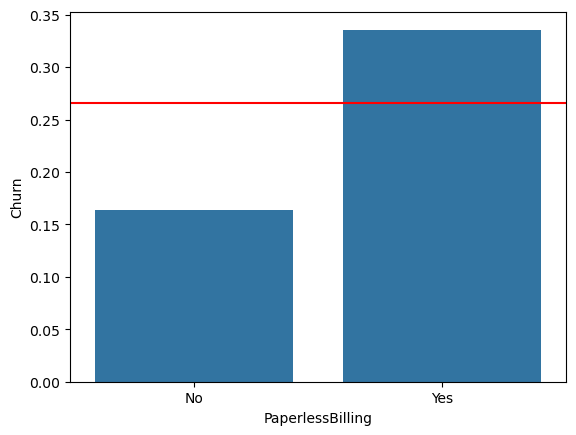

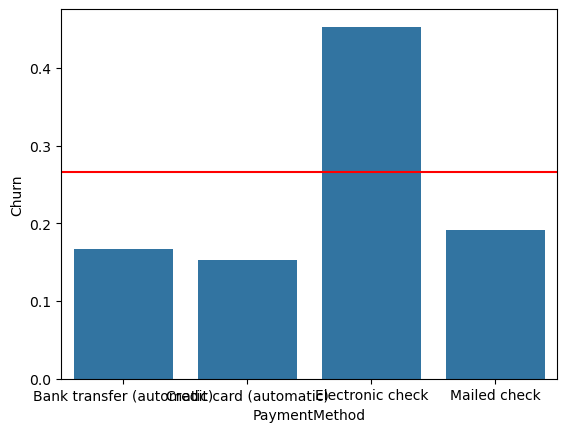

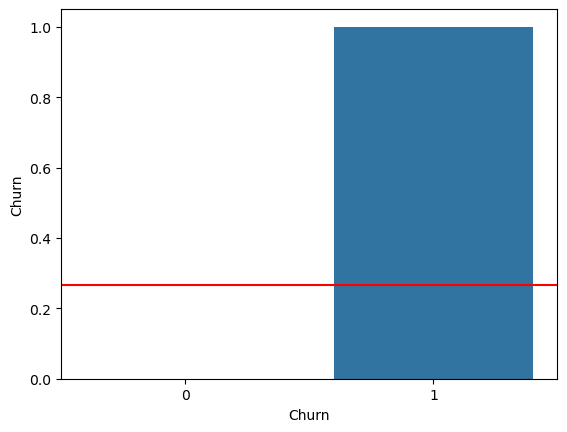

In [44]:
for col in cat_cols:
    sns.barplot(df.groupby(col)['Churn'].mean())
    plt.axhline(y=df.Churn.mean(), color='red')
    plt.show()

In [45]:
df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826164,-0.352229
MonthlyCharges,0.247900,1.000000,0.651182,0.193356
TotalCharges,0.826164,0.651182,1.000000,-0.198347
Churn,-0.352229,0.193356,-0.198347,1.000000


In [46]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992,0.265370
std,24.559481,30.090047,2266.730170,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [47]:
df['tenure_group'] = pd.cut(df.tenure, bins=[0, 9, 29, 55, 72], labels=['New Comers', 'G1', 'G2', 'Loyal'])
df['Mcharge_group'] = pd.cut(df.MonthlyCharges, bins=[18.25, 35.5, 70.35, 89.85, 119], labels=['Low', 'Medium', 'High', 'VHigh'])
df['Tcharge_group'] =  pd.cut(df.TotalCharges, bins=[18.8, 398.55, 1394.55, 3786.6, 99999], labels=['Low', 'Medium', 'High', 'VHigh'])

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13944\2349811502.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



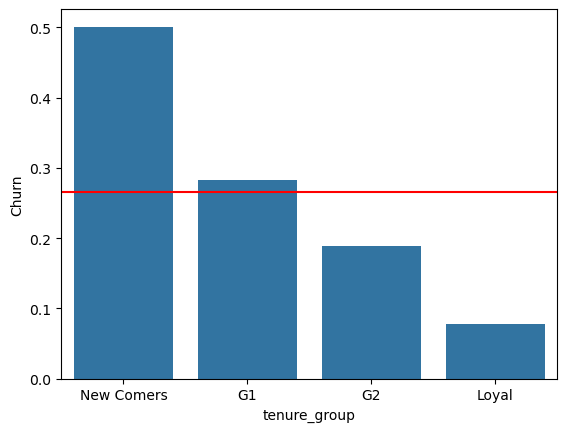

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13944\2349811502.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



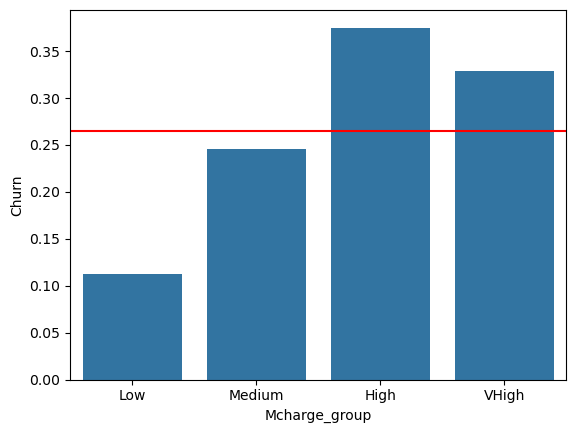

C:\Users\ahmad\AppData\Local\Temp\ipykernel_13944\2349811502.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



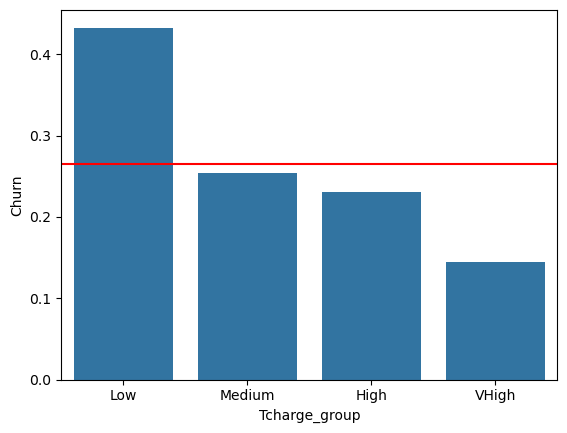

In [48]:
for col in ['tenure_group', 'Mcharge_group', 'Tcharge_group']:
    sns.barplot(df.groupby(col)['Churn'].mean())
    plt.axhline(y=df.Churn.mean(), color='red')
    plt.show()

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group',
       'Mcharge_group', 'Tcharge_group'],
      dtype='object')

In [50]:
X = df.drop(['Churn', 'tenure_group', 'Mcharge_group', 'Tcharge_group'], axis=1)
y = df.Churn

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [53]:
cat = X.select_dtypes(include='O').columns
num = X.select_dtypes(exclude='O').columns
print(cat)
print(num)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
ohe = OneHotEncoder(drop= 'first', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[('scaler', scaler, num),
                                               ('encoder', ohe, cat)])

full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                       ('clf', LogisticRegression())])

full_pipeline.fit(X_train, y_train)
full_pipeline.score(X_test, y_test)